# Miller Ensemble Machine Learning

**Author:** Dan Miller

**Date:** November 18th, 2025

**Objective:** Successfully create an ensemble model to accurately predict the quality of red wine.

## Introduction:

This project explores the Wine Quality UCI dataset, specifically the set on red wine.  With the goal of being able to create an ensemble model to predict wine quality.  The data will first be explored and prepped, then two models will be created.  The performance of the two models will be compared and a conclusion will be given at the end.

## Imports

In [109]:
# Imports

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import (
    AdaBoostClassifier,
    BaggingClassifier,
)
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


## Section 1. Load and Inspect the Data

In [110]:
# Load the dataset

df = pd.read_csv("winequality-red.csv",sep=";")

# Display structure and first few rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


There are 1599 samples available with 12 columns made up of 11 features and the one target.

The target is quality, an integer score from 0-10, with 0 being the worst and 10 the best.

## Section 2. Prepare the Data

We are going to be simplify the target into three categories: low, medium, and high

Then we'll convert those three categories into numeric for modeling ease: low = 0, medium = 1, high = 2

In [111]:
# Helper function to create the quality_label column

def quality_to_label(q):
    """Convert a numeric quality score to a categorical label."""
    if q <= 4:
        return "low"
    elif q <= 6:  # noqa: RET505
        return "medium"
    else:
        return "high"

# Helper function to create numeric column
def quality_to_numeric(q):
    """Convert a numeric quality score to a numeric label."""
    if q <= 4:
        return 0
    elif q <= 6:  # noqa: RET505
        return 1
    else:
        return 2

# Call the apply() method to create the new column

df["quality_label"] = df["quality"].apply(quality_to_label)

df["quality_numeric"] = df["quality"].apply(quality_to_numeric)

## Section 3. Feature Selection and Justification

As mentioned, the target will be quality, but we will be using the quality_numeric column for modeling ease.

The input features will be the rest of the dataset besides quality and quality_label.

In [112]:
# Create the X and y variables for modeling
X = df.drop(columns=["quality", "quality_label", "quality_numeric"])
y = df["quality_numeric"]

## Section 4. Split the Data into Train and Test

In [113]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Section 5. Evaluate Model Performance

Two model variations will be created and evaluated.

In [114]:
# Create a helper function to train and evaluate models

def evaluate_model(name, model, X_train, y_train, X_test, y_test, results):  # noqa: N803
    """Train and evaluate a model, storing results in a dictionary."""
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred, average="weighted")
    test_f1 = f1_score(y_test, y_test_pred, average="weighted")

    print(f"\n{name} Results")
    print("Confusion Matrix (Test):")
    print(confusion_matrix(y_test, y_test_pred))
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"Train F1 Score: {train_f1:.4f}, Test F1 Score: {test_f1:.4f}")

    results.append(
        {
            "Model": name,
            "Train Accuracy": train_acc,
            "Test Accuracy": test_acc,
            "Accuracy Gap": train_acc - test_acc,
            "Train F1 Score": train_f1,
            "Test F1 Score": test_f1,
            "F1 Score Gap": train_f1 - test_f1
        }
    )

### Model 1: AdaBoost (200, lr=0.5)

In [115]:
# Create empty dictionary

results = []

# Call evaluate_model for AdaBoost

evaluate_model(
    "AdaBoost (200, lr=0.5)",
    AdaBoostClassifier(n_estimators=200, learning_rate=0.5, random_state=42),
    X_train,
    y_train,
    X_test,
    y_test,
    results
)


AdaBoost (200, lr=0.5) Results
Confusion Matrix (Test):
[[  1  12   0]
 [  2 255   7]
 [  0  25  18]]
Train Accuracy: 0.8397, Test Accuracy: 0.8562
Train F1 Score: 0.8160, Test F1 Score: 0.8330


### Model 2: Bagging

In [116]:
# Call evaluate_model for Bagging

evaluate_model(
    "Bagging (DT, 100)",
    BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42),
    X_train,
    y_train,
    X_test,
    y_test,
    results
)


Bagging (DT, 100) Results
Confusion Matrix (Test):
[[  0  13   0]
 [  0 252  12]
 [  0  12  31]]
Train Accuracy: 1.0000, Test Accuracy: 0.8844
Train F1 Score: 1.0000, Test F1 Score: 0.8655


## Section 6. Compare Results


Summary of All Models:


,Model,Train Accuracy,Test Accuracy,Accuracy Gap,Train F1 Score,Test F1 Score,F1 Score Gap
0,"AdaBoost (200, lr=0.5)",0.839719,0.856250,-0.016531,0.815964,0.832962,-0.016998
1,"Bagging (DT, 100)",1.000000,0.884375,0.115625,1.000000,0.865452,0.134548


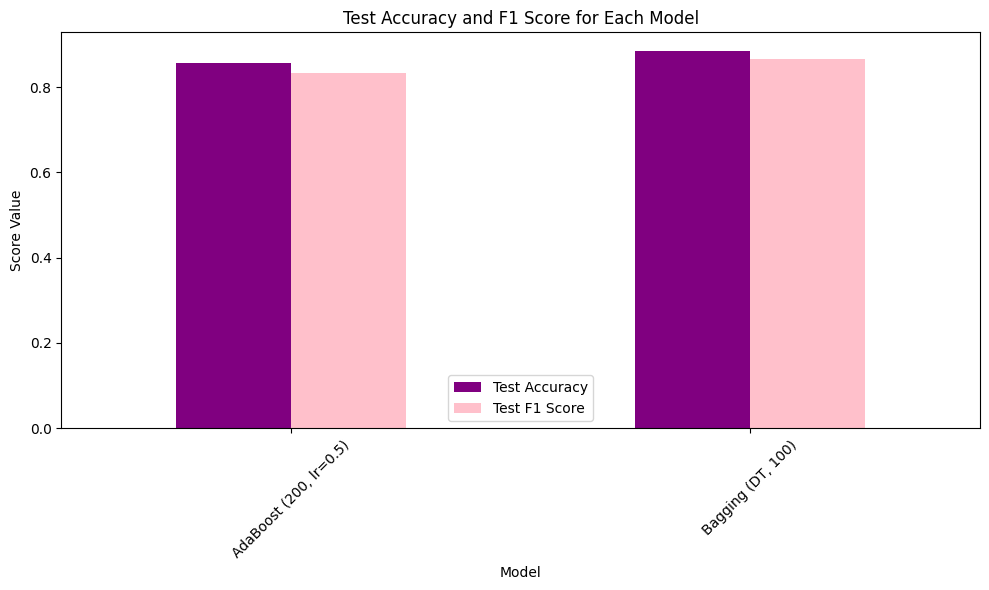

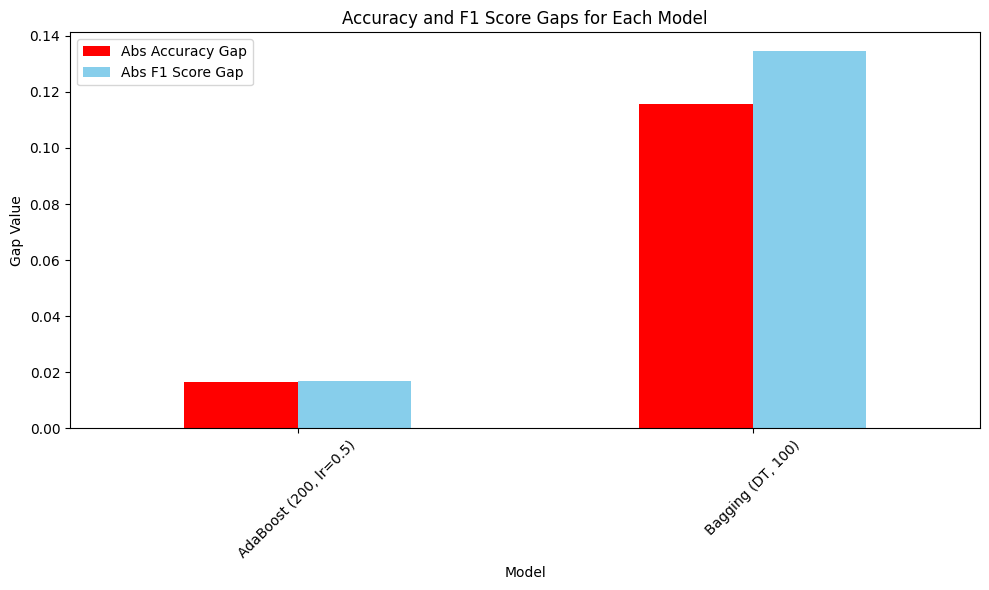

In [117]:
# Create a table of results
results_df = pd.DataFrame(results)

# Print the summary
print("\nSummary of All Models:")
display(results_df)

# Get the data ready for plotting

rdf = pd.DataFrame(results)

rdf["Abs Accuracy Gap"] = rdf["Accuracy Gap"].abs()
rdf["Abs F1 Score Gap"] = rdf["F1 Score Gap"].abs()

# Plot the accuracy and F1 scores for each model
rdf.plot(
    x="Model",
    y=["Test Accuracy", "Test F1 Score"],
    kind="bar",
    color=["purple", "pink"],
    figsize=(10, 6),
)

plt.xlabel("Model")
plt.ylabel("Score Value")
plt.title("Test Accuracy and F1 Score for Each Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the gap results for each model

rdf.plot(
    x="Model",
    y=["Abs Accuracy Gap", "Abs F1 Score Gap"],
    kind="bar",
    color=["red", "skyblue"],
    figsize=(10, 6),
)

plt.xlabel("Model")
plt.ylabel("Gap Value")
plt.title("Accuracy and F1 Score Gaps for Each Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Section 7. Conclusions and Insights

While my notebook only contains AdaBoost and Bagging, my peers have created notebooks with other models such as Random Forest, Gradient Boosting, Voting, and MLP Classifier.  I will update this conclusions section as my peers publish their notebooks.

Of the two models available, and based on test accuracy, Bagging performs the best.  While there seems to be a little bit of over fitting in Bagging as the train accuracy was 100%, its test accuracy was still higher than the AdaBoost's.  Both models performed quite well, AdaBoost had a test accuracy of 0.856 and Boosting's was 0.884.  Bagging only performed slightly better than AdaBoost, and a similar difference can be found in their F1 Scores as well.

Bagging creates many strong and independent models in parallel then brings them all together while AdaBoost creates a sequence of dependent models.  AdaBoost tries to correct previous errors as it learns while Bagging creates many models on random samples of the data.  The strengths of Bagging that AdaBoost doesn't have would be that it uses stronger base learners and isn't strongly influenced by noise.  It would take a deeper dive into the red wine dataset to see how messy it is, meaning if there are many outliers, just a few, or none.

If I was in a competition to build the best predictor, I would start with the Bagging model that I have and tweak the parameters.  Specifically, I'd look into limiting tree depth.  I would also create a Random Forest model as that adds feature randomness, which might help reduce variance.  